In [1]:
import pandas as pd
df=pd.read_csv('d:/data/wine/winequality-red2.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [2]:
df['quality'].value_counts() #샘플링 전의 카운트

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [3]:
train_cols=df.columns[0:11]
X=df[train_cols] #독립변수
y=df['quality'] #종속변수

In [4]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample,y_sample=RandomUnderSampler(random_state=0).fit_sample(X,y)
X_samp=pd.DataFrame(data=X_sample,columns=train_cols)
y_samp=pd.DataFrame(data=y_sample,columns=['quality'])
df2=pd.concat([X_samp,y_samp],axis=1)

Using TensorFlow backend.


In [5]:
df2['quality'].value_counts() #샘플링 후의 카운트

8    10
7    10
6    10
5    10
4    10
3    10
Name: quality, dtype: int64

In [6]:
#샘플링 데이터셋에서 X,y 구분
X=X_samp[train_cols]
y=y_samp['quality']

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                stratify=y,random_state=10)

No handles with labels found to put in legend.


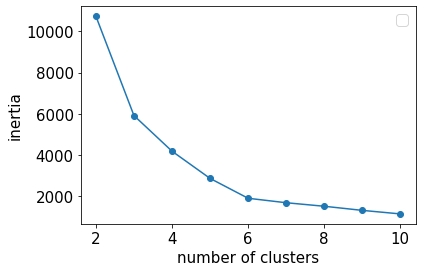

In [8]:
#최적의 클러스터 갯수를 구하는 코드
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#inertia value : 군집의 중앙좌표에서 샘플과의 거리를 합산한 값
#작을수록 군집화가 잘 된 것
#엘보우 포인트를 확인(기울기가 갑자기 꺾이는 포인트): 3
clusters=range(2,11) #클러스터 갯수 2~10
inertias=[]
for n in clusters:
    model=KMeans(n_clusters=n,random_state=10) #Kmeans 모형
    model.fit(X_train) #비지도학습
    inertias.append(model.inertia_)
    
plt.rcParams['font.size']=15
plt.plot(clusters,inertias,'-o')
plt.ylabel('inertia')
plt.xlabel('number of clusters')
plt.legend()

In [13]:
#군집갯수를 3으로 설정한 KMeans 모형
model=KMeans(n_clusters=3, random_state=10)
model.fit(X_train) #군집화
print(model.labels_) #군집모형이 만든 라벨

pred=model.predict(X_test) #모형이 예측한 값
print(pred)
print(y_test.values) #실제값


[2 2 2 2 2 1 0 0 0 2 2 2 2 2 2 1 0 0 2 0 0 2 2 0 2 1 2 0 2 0 2 0 2 1 2 0 1
 2 2 2 1 2 2 0 0 1 2 0]
[1 2 2 0 2 2 2 1 2 2 1 2]
[6 5 3 8 7 7 8 5 3 4 6 4]


In [14]:
#군집갯수를 6으로 설정한 KMeans 모형
model=KMeans(n_clusters=6, random_state=10)
model.fit(X_train) #군집화
print(model.labels_) #실제값

pred=model.predict(X_test) #모형이 예측한 값
print(pred)
print(y_test.values) #실제값


[5 5 1 1 1 2 3 3 0 1 5 5 5 5 5 4 0 0 1 3 0 5 5 3 5 4 1 3 5 0 5 0 5 2 1 3 4
 1 5 5 4 5 1 3 1 2 5 3]
[4 1 5 1 5 5 5 4 5 1 4 5]
[6 5 3 8 7 7 8 5 3 4 6 4]


In [15]:
#실루엣 포인트:클러스터 안의 데이터들이 얼마나 비슷한지를 타나내는 값
from sklearn.metrics import silhouette_score
silhouette_score(X_test,pred)

0.59095189693368

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B26AD48748>,
      dtype=object)

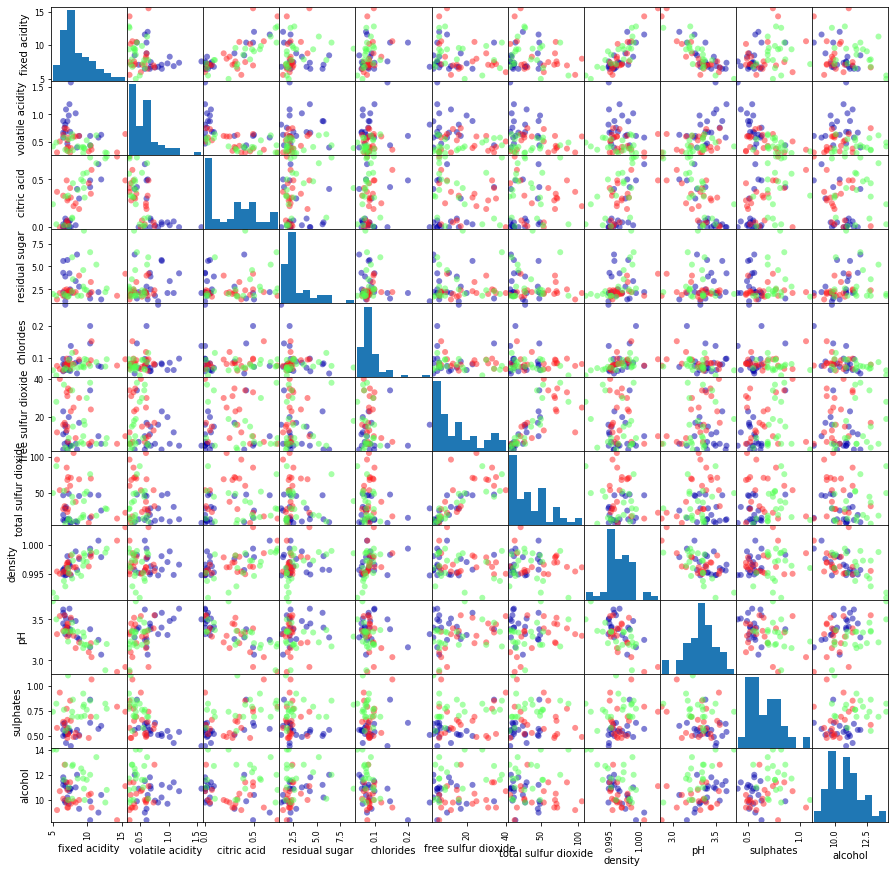

In [18]:
import mglearn
pd.plotting.scatter_matrix(X,c=y,figsize=(15,15),marker='o',
                          cmap=mglearn.cm3)

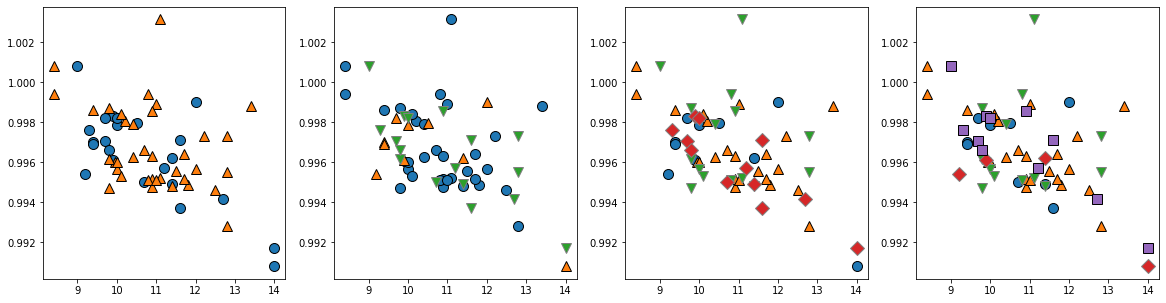

In [19]:
import mglearn
#1행 4열의 서브플롯
fig,axes=plt.subplots(1,4,figsize=(20,5))
idx=0
for k in [2,3,4,5]:
    kmeans=KMeans(n_clusters=k) #군집갯수를 2,3,4,5개로 설정
    kmeans.fit(X)
    lbls=kmeans.labels_ #모형이 분류한 라벨
    #산점도
    mglearn.discrete_scatter(X['alcohol'],X['density'],lbls,
                            ax=axes[idx])
    idx +=1